# Modelando, visualizando e resolvendo sistemas lineares

Este capítulo está ligado ao seguintes objetivos didáticos do curos:
1. Resolver problemas de geometria espacial envolvendo conceitos de espaços vetoriais
1. Avaliar e resolver sistemas de equações lineares

Referência bibliográfica: [Jim Hefferon - Linear Algebra - 4th Edition](https://hefferon.net/linearalgebra/) - Chap. One, I, Chap. Three, III-IV

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Etapa 1

# Exercício 1
**Objetivo: Entender o problema de estimar custos de produção**

Uma doceria faz brigadeiros. Para fazer uma fornada com 20 brigadeiros, é preciso usar 40g de manteiga, uma lata (400g) de leite condensado e 20g de chocolate em pó.

O custo de cada ingrediente está na tabela:

Ingrediente | Custo por embalagem 
--- | ---
Leite condensado | R\$10,00 (lata de 400g) 
Manteiga | R\$15,00 (pote com 200g)
Chocolate em pó |R\$18,00 (caixa com 200g)

Para calcular o custo de uma fornada de brigadeiros, precisamos multiplicar o custo de cada embalagem pela quantidade dele que foi utilizada, e então somar os resultados.

Complete o código abaixo para estimar quanto custa fazer uma fornada de 20 brigadeiros.

In [11]:
# Resolva o exercício aqui
custo_por_ingrediente = [12, 0.12, 0.9] # O que esses números representam?
quantidades = [1, 40, 20]
custo_total = 0
custo_total_2 = 0
for n in range(len(custo_por_ingrediente)): # O que precisa ser feito para cada ingrediente?
    custo_total_2 += custo_por_ingrediente[n] * quantidades[n]
custo_total += np.inner(custo_por_ingrediente, quantidades)
print(custo_total)
print(custo_total_2)

34.8
34.8


# Exercício 2
**Objetivo: Usar soma e multiplicação ponto a ponto de vetores**

No primeiro exercício, fizemos um laço explícito para multiplicar duas listas e somar os resultados ponto a ponto. A equação que implementamos foi:

$$
C = \sum_{n=0}^{N-1} I[n] Q[n],
$$

onde $\boldsymbol{I}$ guarda os ingredientes e $\boldsymbol{Q}$ guarda as quantidades utilizadas.

Se usarmos vetores ao invés de listas, podemos usar a seguinte operação:
$$
C =  \sum_{n=0}^{N-1} I \odot Q.
$$

O operador $\odot$ significa "produto ponto-a-ponto" (*pointwise multiplication*), e é definido como:
$$
(I \odot Q)[n] = I[n] Q[n]
$$

Quando multiplicamos dois vetores de numpy, realizamos a operação $\odot$ entre eles. Veja, por exemplo:

In [12]:
a = np.array([1, 2, 7])
b = np.array([3, 2, 1])
c = a * b
print(c)

[3 4 7]


Também, podemos usar a operação `np.sum(x)` para encontrar a soma de todos os elementos do array `x`.

Com base nisso, re-escreva abaixo o código do exercício 1 usando os operadores de multiplicação ponto-a-ponto e a função `np.sum()`, de forma que não seja necessário usar laços em seu código.

In [3]:
custo_por_ingrediente = np.array([10, 15, 18]) # O que esses números representam?
quantidades = np.array([1, 0.2, 0.1])   
a = custo_por_ingrediente * quantidades

print(np.sum(a))


14.8


# Exercício 3
**Objetivo: modelar a soma de produtos como um produto interno**

A operação $\sum_n x[n]y[n]$, que fizemos nos exercícios 1 e 2, pode ser interpretada como uma soma dos elementos de $\boldsymbol{x}$ ponderada pelos elementos correspondentes em $\boldsymbol{y}$. Essa operação é muito comum, e é chamada de "produto interno" (*inner product*). O produto interno é definido como:

$$
<x, y> = \sum_n x[n]y[n] = \sum_n x \odot y
$$

Em Numpy, a função que calcula o produto interno de dois vetores é `np.inner(x, y)`, então poderíamos resolver os exercícios 1 e 2 usando:

In [19]:
custo_total = np.inner(custo_por_ingrediente, quantidades)
print(custo_total)

34.8


Vamos agora expandir nossa doceria. Além de brigadeiros, vamos adicionar *ganache* no cardápio.

Para fazer um pote de ganache, é preciso usar 40g de manteiga, 40g de chocolate e 200mL de creme de leite. Uma caixinha de 200mL de creme de leite custa R\$2,80. Nossa tabela de ingredientes então fica:

Ingrediente | Custo por embalagem 
--- | ---
Leite condensado | R\$10,00 (lata de 400g) 
Manteiga | R\$15,00 (pote com 200g)
Chocolate em pó |R\$18,00 (caixa com 200g)
Creme de leite | R\$2,80 (caixa com 200mL)

Em nosso modelo, gostaríamos de usar um único vetor `custo_por_ingrediente` tanto para o brigadeiro quanto para o ganache, e passamos a ter um vetor `quantidades_brigadeiro` para o brigadeiro e um vetor `quantidades_ganache` para o ganache.

Complete a solução abaixo para calcular o custo de cada uma das fornadas de doce.

1. Complete a definição dos vetores `quantidades_brigadeiro` e `quantidades_ganache`. Como podemos fazer para representar o fato de que um brigadeiro não usa creme de leite e que um ganache não usa manteiga?
2. Como a lista de vetores `custos_totais` é calculada? Qual é o conteúdo dela?
3. Adicione o "doce de leite" ao cardápio. A receita dele é muito simples: deixamos uma lata de leite condensado ferver na panela de pressão por 40 minutos. Lembre-se de fazer essa adição sem alterar o código abaixo da linha marcada.
4. Adicione o "doce de coco" ao cardápio. Uma fornada de 20 doces usa 200g de leite condensado e 250g de coco ralado. O pacote de 1kg de coco ralado custa R$35,00.  Lembre-se de fazer essa adição sem alterar o código abaixo da linha marcada.

In [21]:
custo_por_ingrediente = np.array([10, 15, 18, 2.8])

quantidades_brigadeiro = np.array([1, 1/5, 0.1, 0]) # Complete esse
quantidades_ganache = np.array([0, 0.2, 0.2, 1]) # Complete esse

quantidades = [quantidades_brigadeiro, quantidades_ganache]

# Não modifique nada abaixo desta linha
custos_totais = []
for idx, q in enumerate(quantidades):
    custos_totais.append (np.inner(custo_por_ingrediente, q))
print(custos_totais)

[np.float64(14.8), np.float64(9.399999999999999)]


# Exercício 4
**Objetivo: Usar matrizes ao invés de listas de vetores**

No exercício 3, usamos um vetor para representar cada uma das quantidades de ingredientes. Ao invés de fazer isso, podemos usar matrizes, que são essencialmente "vetores de vetores".

Assim como tínhamos usado uma lista para inicializar os elementos de um vetor, vamos usar listas de listas para inicializar os elementos de uma matriz:

In [22]:
a = np.array([ [1, 2, 3], [4, 5, 6] ])
print(a)
print(a[0,1])
print(a.shape)

[[1 2 3]
 [4 5 6]]
2
(2, 3)


In [36]:
a = np.array([ [0.8, 0.2], [-0.1, 1.1] ])
b = np.array([[2], [2]])


print(a @ a)

[[ 0.62  0.38]
 [-0.19  1.19]]


Veja que todas as listas passadas têm que ter o mesmo tamanho, o que permite gerar essa estrutura retangular com linhas e colunas.

Vamos praticar o uso de matrizes.

Crie duas matrizes:
1. A matriz de receitas $\boldsymbol{X}$, que tem um linha para cada receita da doceria e uma coluna para cada ingrediente usado, isto é, $x[i,j]$ representa a quantidade do ingrediente $j$ na receita $i$.
2. A matriz de custos $\boldsymbol{Y}$, que tem apenas uma coluna e cada linha representa o custo de cada ingrediente, na mesma ordem usada na matriz $\boldsymbol{X}$.
3. Veja que $\boldsymbol{X}$ deveria ser uma matriz com 4x5 (isto é, 4 linhas e 5 colunas), e $\boldsymbol{Y}$ deveria ser uma matriz 5x1, isto é, com 5 linhas e 1 coluna. Use o método `shape` para confirmar as dimensões das matrizes.

In [28]:
X = np.array( [ [1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5] ])
Y = np.array( [ [10], [10], [10], [10], [10] ])
print(X.shape)
print(Y.shape)
print(X)
print(Y.T)

(4, 5)
(5, 1)
[[1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]]
[[10 10 10 10 10]]


# Exercício 5
**Objetivo: Usar multiplicação matricial para o modelo mais compacto**

Uma operação importante que vamos usar hoje é a *multiplicação matricial* (*dot product*). A notação matemática para esta operação é:
$$
\boldsymbol{Z} = \boldsymbol{X} \boldsymbol{Y}
$$

Essa operação cria uma matriz $\boldsymbol{Z}$ tal que o elemento $z[i,j]$ é o produto interno entre a i-ésima linha de $\boldsymbol{X}$ e a j-ésima coluna de $\boldsymbol{Y}$, isto é:

$$
z[i,j] = <\boldsymbol{X[i,:]}, \boldsymbol{Y[:,j]}> = \sum_{n=0}^{N-1} x[i,n] y[n,i]
$$

Veja por exemplo:
$$ \boldsymbol{x} = 
\begin{bmatrix}
    1 & 2\\
    3 & 4
\end{bmatrix}
$$

$$ \boldsymbol{y} = 
\begin{bmatrix}
    -1 \\
    -2 
\end{bmatrix}
$$

$$ \boldsymbol{z} = 
\begin{bmatrix}
    -1 \times 1 + -2 \times 2 \\
    -1 \times 3 + -2 \times 4
\end{bmatrix}
= 
\begin{bmatrix}
    -1 -4 \\
    -3 -8
\end{bmatrix}
= 
\begin{bmatrix}
    -5 \\
    -11
\end{bmatrix}
$$


A multiplicação matricial pode ser representada em Python usando o operador `@` ou então a função `np.dot()`:

In [23]:
x_ = np.array([ [1, 2], [3, 4] ])
y_ = np.array([ [-1], [-2]])
z_ = x_ @ y_
print(z_)
z_ = np.dot(x_, y_)
print(z_)

[[ -5]
 [-11]]
[[ -5]
 [-11]]


Para que a operação de multiplicação matricial seja possível, é preciso que haja tantas colunas em $X$ quanto linhas em $Y$, mas o número de linhas de $X$ e o de colunas em $Y$ é livre. Em outras palavras:

* $X \in \mathbb{R}^{i \times N}$
* $Y \in \mathbb{R}^{N \times j}$
* $Z \in \mathbb{R}^{i \times j}$

Usamos uma notação $M \in \mathbb{R}^{A \times B}$ (geralmente isso é lido como "M pertence a R-A por B") para significar que a matriz $M$ tem $A$ linhas e $B$ colunas. Essa notação vem da ideia do conjunto dos números reais ($\mathbb{R}$) - lembre-se que, quando $x$ é um número real qualquer, dizemos que "x pertence aos números reais, ou $x \in \mathbb{R}$. Da mesma forma, quando um vetor $v$ tem $N$ elementos, dizemos que ele pertence a "R-N$, ou, $v \in \mathbb{R}^N$.

1. Calcule (manualmente, no papel) o valor da matriz $z$ abaixo, e, após, confirme seu resultado usando Python. 
$$
z = x y\\

x =
\begin{bmatrix}
    0 & 1\\
    2 & 3
\end{bmatrix}\\ 

y =
\begin{bmatrix}
    2 \\
    1
\end{bmatrix}
$$

2. Se temos as matrizes $X$, com uma linha por receita e uma coluna por ingrediente, e $A$, com uma linha por ingrediente e apenas uma coluna, (a) qual deve ser a dimensão da matriz $Y=XA$? (b) O que cada elemento de $Y$ representa?

3. Vamos supor que temos uma outra opção de mercado, com outros custos para os ingredientes. O que aconteceria com a interpretação dos elementos da matriz $Y$ do ítem acima se os preços do novo mercado fossem representados como uma nova coluna na matriz $A$?


# Exercício 6
**Objetivo: Interpretar a multiplicação matricial como um sistema com entradas e saídas**

Nos exercícios acima, fizemos uma mutiplicação matricial. Partimos da matriz $X$, (receitas por ingrediente), e multiplicamos pela matriz $A$ (ingrediente por custo), gerando a matriz $Y$ (receitas por custo), ou: $Y = XA$.

A multiplicação matricial poderia ser interpretada como uma função escrita em Python parecida com:

    def calcular_custos(receitas, custos):
        # Executa multiplicacao matricial
        custos = receitas @ custos
        return custos

---

1. A doceria gostaria de que seu preço de venda fosse sempre 10% superior ao custo com ingredientes. Faça um programa que calcula o preço de venda de cada receita usando multiplicações matriciais. Qual é o preço de venda de cada receita?
3. A doceria decidiu fazer dois kits para vender: o kit A, que tem 100 brigadeiros e 1 pote de ganache, e o kit B, que tem 10 brigadeiros, 10 doces de coco e 2 potes de ganache. Faça um programa que calcula o preço de venda de cada kit usando multiplicações matriciais. Qual é o preço de venda de cada kit?
4. Um cliente fez um pedido de dois kits A e três kits B. Usando apenas multiplicações matriciais (e o mesmo processo que fizemos ao longo deste exercício) qual é o preço total deste pedido?



# Etapa 2


# Exercício 7
**Objetivo: entender o sistema presa-predador linear**

Uma situação que acontece na natureza é que alguns seres vivos são predadores de outros. Por exemplo: o [carcará](https://pt.wikipedia.org/wiki/Carcar%C3%A1), uma ave de rapina sul-americana parecida com um falcão, se alimenta de sapos, e, por isso, dizemos que o carcará é um *predador* do sapo. Nessa relação, o carcará é o *predador* e o sapo é a *presa*. Nosso objetivo, neste exercício, é encontrar como a quantidade de carcarás e de sapos varia com o tempo.

Na nossa simulação, o tempo é medido em meses (veja que $t$ será sempre um número inteiro!). Vamos usar a variável $c$ para representar o número de carcarás na população, e $s$ para representar o número de sapos. Então, $c_t$ é o número de carcarás no tempo $t$, e $s_t$ é o número de sapos no tempo $t$. Como cada carcará come muitos sapos, vamos convencionar que $c$ está em unidades e $s$ está em milhares.

Vamos assumir alguns comportamentos 

* A população de carcarás naturalmente cai em 20% a cada mês
* Para cada cinco mil sapos existentes naquele mês, um novo carcará nasce
* A população de sapos naturalmente sobe em 10% porque eles se reproduzem
* A cada mês, cada carcará consegue comer 100 sapos

Isso significa que podemos escrever equações para calcular o número de carcarás e de sapos a cada mês, tomando por base a quantidade deles no mês anterior:

$$ 
\begin{cases}
    \begin{aligned}
    c_t & = 0.8 c_{t-1} + 0.2 s_{t-1} \\
    s_t & = - 0.1 c_{t-1} + 1.1 s_{t-1} \\
    \end{aligned}
\end{cases}
$$

1. Complete a função abaixo para simular a mudança populacional a cada mês por um período de 10 anos
2. Simule a mudança populacional para as as condições iniciais: $(c_0=10, s_0=100)$, $(c_0=6, s_0=5)$, $(c_0=10.3, s_0=10.3)$, $(c_0=10, s_0=10)$. O que acontece em cada um desses casos?
3. O que acontece com as populações se os gaviões começarem a comer mais e mais?
4. O que acontece com as populações se os sapos passarem a se reproduzir menos?

Text(0, 0.5, 'População')

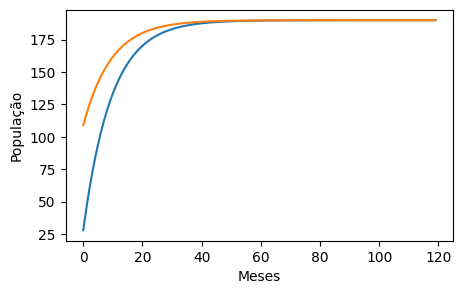

In [4]:
def executar_modelo(c, s, meses):
    # Faça sua função aqui, implementando as equações do sistema!
    c_mes_passado = c
    s_mes_passado = s

    c_list = []
    s_list = []
    for i in range(meses):
        c_este_mes = 0.8 * c_mes_passado + 0.2 * s_mes_passado
        s_este_mes = -0.1 * c_mes_passado + 1.1 * s_mes_passado
        c_mes_passado = c_este_mes
        s_mes_passado = s_este_mes
        c_list.append(c_este_mes)
        s_list.append(s_este_mes)
    return c_list, s_list


c_list, s_list = executar_modelo(c=10, s=100, meses=120)

import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.plot(c_list, label="Carcarás")
plt.plot(s_list, label="Sapos")
plt.xlabel('Meses')
plt.ylabel('População')


# Exercício 8
**Objetivo: escrever um sistema dinâmico linear em seu formato matricial**

Uma maneira de escrever o sistema de equações que usamos no exercício anterior é usando a forma matricial:

$$
\begin{bmatrix}
    c_t \\
    s_t 
\end{bmatrix}
=
\begin{bmatrix}
    0.8 & 0.2\\
    -0.1 & 1.1
\end{bmatrix} 
\begin{bmatrix}
    c_{t-1} \\
    s_{t-1}
\end{bmatrix}
$$

1. Realize manualmente o cálculo acima e verifique que essa formulação matricial é equivalente ao sistema de equações
2. Com essa formulação, o cálculo das populações no mês seguinte passa a ser uma multiplicação matricial. Reformule a função `executar_modelo` para que ela opere diretamente com matrizes e vetores. Teste sua nova função para confirmar que tem os mesmos resultados da versão anterior.



[10, np.float64(28.0), np.float64(44.2)]
[100, np.float64(109.00000000000001), np.float64(117.10000000000002)]


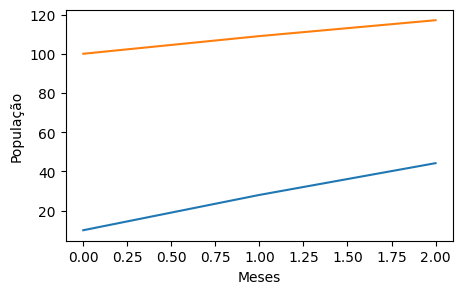

In [35]:

def executar_modelo(c, s, meses):
    # Faça sua função aqui, implementando as equações do sistema!
    populacoes_mes_passado = np.array([[c], [s]])
    A = np.array([[0.8, 0.2], [-0.1, 1.1]])
    c_mes_passado = c
    s_mes_passado = s

    c_list = [c]
    s_list = [s]
    for i in range(meses):
        populacao_este_mes = A @ populacoes_mes_passado
        c_list.append(populacao_este_mes[0,0])
        s_list.append(populacao_este_mes[1,0])
        populacoes_mes_passado = populacao_este_mes
    return c_list, s_list


c_list, s_list = executar_modelo(c=10, s=100, meses=2)

import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.plot(c_list, label="Carcarás")
plt.plot(s_list, label="Sapos")
plt.xlabel('Meses')
plt.ylabel('População')

print(c_list)
print(s_list)


# Exercício 9
**Objetivo: usar a multiplicação matricial para executar várias simulações paralelamente**

Uma possível ideia para simular diversas condições iniciais simultaneamente é usar uma matriz de condições iniciais com uma coluna para cada condição inicial, isto é, algo como:
$$
\begin{bmatrix}
    c^{(1)}_{t} & c^{(2)}_{t} & c^{(3)}_{t} \\
    s^{(1)}_{t} & s^{(2)}_{t} & s^{(3)}_{t} 
\end{bmatrix}=
\begin{bmatrix}
    0.8 & 0.2\\
    -0.1 & 1.1
\end{bmatrix} 
\begin{bmatrix}
    c^{(1)}_{t-1} & c^{(2)}_{t-1} & c^{(3)}_{t-1} \\
    s^{(1)}_{t-1} & s^{(2)}_{t-1} & s^{(3)}_{t-1} 
\end{bmatrix}
$$

1. Realize manualmente (no papel) a multiplicação acima. Evidencie como cada coluna da matriz do lado esquerdo da equação depende somente das colunas correspondentes na matriz de entradas no lado direito da equação, isto é, $c^{(2)}$, por exemplo, não influencia $c^{(1)}$.
2. Execute todas as simulações de variações do problema que fizemos nos ítens anteriores, mas agora usando a formulação matricial para simularmos todos simultaneamente.


In [ ]:

def executar_modelo(c, s, meses):
    # Faça sua função aqui, implementando as equações do sistema!
    populacoes_mes_passado = np.array([[c], [s]])
    A = np.array([[0.8, 0.2], [-0.1, 1.1]])
    c_mes_passado = c
    s_mes_passado = s

    c_list = [c]
    s_list = [s]
    for i in range(meses):
        populacao_este_mes = A @ populacoes_mes_passado
        c_list.append(populacao_este_mes[0,0])
        s_list.append(populacao_este_mes[1,0])
        populacoes_mes_passado = populacao_este_mes
    return c_list, s_list


c_list, s_list = executar_modelo(c=10, s=100, meses=120)

import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.plot(c_list, label="Carcarás")
plt.plot(s_list, label="Sapos")
plt.xlabel('Meses')
plt.ylabel('População')


# Exercício 10
**Objetivo: entender o processo de transposição de matrizes**

Você deve ter percebido que na etapa 1 desta aula usamos as linhas de uma matriz para representar cada um dos nossos elementos, ao passo que agora temos colunas representando esses mesmos elementos. Na verdade, podemos optar por qualquer uma das representações, e para isso usamos uma operação chamada "transposição". Na transposição, as linhas de uma matriz se tornam colunas e vice-versa, isto é, se uma matriz $X$ tem elementos $x[i,j]$, então a matriz transposta $X^T$ tem elementos $x^T[i,j] = x[j,i]$. Por exemplo:
$$
X =
\begin{bmatrix}
    a & b & c\\
    d & e & f
\end{bmatrix} \rightarrow
X^T =
\begin{bmatrix}
    a & d\\
    b & e\\
    c & f
\end{bmatrix}
$$

É claro que a transposta da transposta de uma matriz é a própria matriz original:
$$
X^{T^T} = X
$$

A transposição de matrizes tem uma propriedade muito importante, que é a de possibilitar inverter a ordem das matrizes em uma multiplicação:
$$
(AB)^T = B^T A^T
$$

1. Em nossa simulação de carcarás e sapos, utilizamos a forma: $Y=AX$. Identifique as matrizes $Y$, $A$ e $X$.
2. Na representação atual, os elementos de $Y$ são suas colunas. Podemos transpor os dois lados da equação e obter: $Y^T = (AX)^T$. Use as propriedades da transposição de matrizes para simplificar essa equação e permitir que $Y^T$ seja encontrado usando somente uma multiplicação matricial.
3. Altere sua função `executar_modelo` para que ela passe a operar com a forma transposta de seu problema.

# Exercício 11
**Objetivo: refletir sobre as representações em linhas e em colunas**

Até o momento, você deve ter verificado que podemos operar com matrizes que representam elementos ao longo de suas linhas ou ao longo de suas colunas. Se tudo correu bem, você provavelmente verificou que as duas representações são estritamente iguais, ao menos no que diz respeito aos números que estão lá representados. Porém, há comunidades que usam a representação "cada elemento é uma linha" e outras que usam "cada elemento é uma coluna".

1. Quando pensamos em uma planilha de notas de alunos, em que cada linha representa um aluno e cada coluna representa uma das avaliações, qual das representações estamos usando?
2. Quando pensamos em um sistema de equações, como aquele que escrevemos para o caso dos carcarás e dos sapos, qual das representações estamos usando?
3. Existe uma representação que seja, em princípio, "melhor" que a outra?


# Etapa 3
# Exercício 12
**Objetivo: Entender o algoritmo PageRank como navegação aleatória e probabilidade**

O buscador Google foi criado com base num algoritmo chamado PageRank. O PageRank tem o objetivo de identificar quais são as páginas web mais relevantes que se relacionam a uma determinada "query". A premissa do PageRank é que as páginas que são linkadas por mais páginas são mais relevantes, e que as páginas que recebem links de páginas relevantes também são mais relevantes. Uma maneira de modelar isso é usando a ideia de um "surfista aleatório": se uma pessoa clica aleatoriamente em links durante sua navegação na Internet, essa pessoa vai passar, com mais probabilidade, em sites relevantes. Daí, a ideia é que a relevância de uma página seja proporcional à probabilidade do surfista estar nessa página ao longo de sua navegação aleatória.

Vamos partir de uma matriz $A$ que representa todas as páginas da web. Como estamos explicando esse conceito, vamos usar primeiro uma "web fictícia" com 4 páginas. O elemento $a_{i,j}$ representa a probabilidade de, clicando num link aleatório da página $j$, sair na página $i$. Isso significa que, se $a_{i,j}=0$, então não há link da página $j$ para a página $i$:

In [10]:
# A[i,j] = probabilidade de chegar na página i vindo da página j
A = np.array([[0, 1, 0, 0], [1, 0, 1, 0], [1, 0, 0, 1], [1, 1, 1, 0]])
A = A / np.sum(A, axis=0)
print(A)

[[0.         0.5        0.         0.        ]
 [0.33333333 0.         0.5        0.        ]
 [0.33333333 0.         0.         1.        ]
 [0.33333333 0.5        0.5        0.        ]]


1. A matriz $A$ definida acima representa quatro páginas web. Há um link da página $0$ para a página $2$? Há um link da página $2$ para a página $0$?
1. Abaixo, há um código que simula o surfista aleatório. Analise criticamente o código e decida se ele, de fato, está simulando um surfista aleatório. Se for o caso, corrija o que estiver errado.
2. O código dá resultados significativamente diferentes quando o surfista é inicializado em uma outra página que não a $0$?

In [13]:
def randomsurfer_pagerank(A, i_init=0):
    hops = np.zeros(A.shape[0]) # hops[i] = quantas vezes o surfista caiu na página p_i'
    nodes = range(A.shape[0]) # Uma lista com os números das páginas
    i_ = i_init # Em que página o surfista está?
    for count in range(100000): # Quantos saltos o surfista vai fazer?
        hops[i_] += 1 # Conto uma passagem na página que estou
        possibilities = A[:,i_] # Probabilidades para links que saem da página i_
        next_i = np.random.choice(nodes, p=possibilities) # Escolho a próxima página
        i_ = next_i # Navego para próxima página
    
    hops = hops / np.sum(hops) # Transformo contagens em probabilidades
    return hops

print(randomsurfer_pagerank(A, 0))

[0.10781 0.21489 0.35636 0.32094]


# Exercício 13
**Objetivo: Modelar as probabilidades de transição do PageRank em forma matricial**

Podemos interpretar os elementos da matriz $A$ como a probabilidade de ir para a página $i$ sabendo que estamos na página $j$, isto é:
$$
a_{i,j} = P(s_t = i | s_{t-1} = j)
$$

Vamos representar a nossa localização na web através da matriz-coluna $X$. Essa matriz será inicializada com zeros, exceto na posição $0$, que será igual a $1$, significando que estamos na página $0$, isto é:
$$
X =
\begin{bmatrix}
    1 \\
    0 \\
    0 \\
    0
\end{bmatrix}
$$

1. Calcule (manualmente) a matriz $Y = AX$. 
2. Qual é a soma dos elementos de $Y$?
3. O que cada elemento da matriz $Y$ significa em termos das probabilidades ligadas ao nosso problema?

# Exercício 14
**Objetivo: Implementar o algoritmo PageRank com multiplicações matriciais**

Nesta seção, faremos uma dedução matemática. Estou acreditando que ela é importante porque esse resultado faz uma ponte entre as probabilidades condicionais e a multiplicação matricial que não está em nenhum livro didático, mas que é usada constantemente em textos de *machine learning*.

Vamos partir do seguinte resultado, ligado à soma de interseções, assumindo que os eventos $C_i$ são disjuntos e a união de todos os eventos $C_i$ cobre $A$ completamente:

$$
P(A) = P(A \cap C_1) + P(A \cap C_2) + .... + P(A \cap C_N),
$$

Usando a definição de probabilidades condicionais, temos:

$$
P(A) = P(A|C_1)P(C_1) + P(A|C_2)P(C_2) + .... + P(A|C_N)P(C_N),
$$

que significa que a probabilidade de um evento é igual à soma de todas as probabilidades desse evento ligadas a diferentes condições, poderadas pelas probabilidades das condições.

Pelo resultado da soma de probabilidades condicionais, podemos calcular a probabilidade de chegar à página $0$, isto é, $P(s_t = 0)$, somando as probabilidades de chegar na página $0$ à partir de cada uma das páginas $j$ e ponderando pelas probabilidades de estar na página $j$ em primeiro lugar, isto é:

$$
P(s_t = 0) = P(s_t = 0 | s_{t-1}=0) P(s_{t-1}=0) + P(s_t = 0 | s_{t-1}=1) P(s_{t-1}=1) + ... + P(s_t = 0 | s_{t-1}=N-1) P(s_{t-1}=N-1)
$$

Podemos generalizar esse resultado para todas as páginas $i$:

$$
P(s_t = i) = P(s_t = i | s_{t-1}=0) P(s_{t-1}=0) + P(s_t = i | s_{t-1}=1) P(s_{t-1}=1) + ... + P(s_t = i | s_{t-1}=N-1) P(s_{t-1}=N-1)
$$

Essa expressão pode ser reduzida para uma somatória:

$$
P(s_t = i) = \sum_{j=0}^ {N-1}  P(s_t = i | s_{t-1}=j) P(s_{t-1}=j).
$$

Porém, construímos nossa matriz $A$ de forma que $a[i,j]=P(s_t = i | s_{t-1}=j)$, e nossa matriz-coluna $X$ é tal que $x[j,0] = P(s_{t-1}=j)$, então temos:

$$
P(s_t = i) =  \sum_{j=0}^ {N-1} a[i,j] x[j, 0].
$$

Se representarmos nossas probabilidades $P(s_t=i)$ numa matriz $Y$, passamos a ter:
$$
\boldsymbol{Y}  =   \sum_{j=0}^ {N-1} a[i,j] x[j, 0].
$$

A expressão à direita dessa equação é uma multiplicação matricial:
$$
\boldsymbol{Y}  =  \boldsymbol{A} \boldsymbol{X}.
$$

E, portanto, "dar um passo" em nosso navegador probabilístico significa multiplicar nossa matriz de probabilidades atual pela matriz $A$.

Tendo em vista esta dedução,
1. Implemente o algoritmo PageRank usando multiplicações matriciais.
2. Compare o resultado com aquele encontrado usando o navegador aleatório.


In [17]:
# Escreva sua solução aqui
X = np.array([[1,0,0,0]]).T
A@(A@X)

array([[0.16666667],
       [0.16666667],
       [0.33333333],
       [0.33333333]])

# Etapa 4
# Exercício 17
**Objetivo: escrever um sistema de equações com três variáveis*

Três amigos foram a uma feira. O primeiro comprou um pé de alface e duas beterrabas, e pagou um total de 25 reais. O segundo comprou dois pés de alface, uma beterraba e um ramo de coentro, e pagou 22 reais. O terceiro comprou três pés de alface e um ramo de coentro e pagou 17 reais.

Neste exercício, vamos descobrir quanto custa cada pé de alface, cada beterraba e cada ramo de coentro isoladamente. Para isso, escreva (no papel!) as equações que permitem calcular o custo de cada uma das compras. Use as variáveis $A$, $B$ e $C$ para representar os preços de cada um dos ítens da compra. Ao fim dessa etapa, você deve encontrar algo parecido com:

$
\begin{cases}
    \begin{aligned}
    \text{Preço da compra 1} & = \text{Qt alface na compra 1} \times \text{Preço do alface} + \text{Qt beterraba na compra 1} \times \text{Preço da beterraba} + \text{Qt coentro na compra 1} \times \text{Preço do coentro} \\
    \text{Preço da compra 2} & = \text{Qt alface na compra 2} \times \text{Preço do alface} + \text{Qt beterraba na compra 2} \times \text{Preço da beterraba} + \text{Qt coentro na compra 2} \times \text{Preço do coentro} \\
    ... & = \sum_{\text{ítens}} \text{Quantidade do ítem na compra} \times \text{Preço do ítem}
    \end{aligned}
\end{cases}
$





In [25]:
import numpy as np
A = np.array([[1,2,0], [2,1,1], [3,0,1]])
y = np.array([[25,22,17]]).T
# 
Ainv = np.linalg.inv(A)


x =Ainv @ y
print(x)

[[ 5.]
 [10.]
 [ 2.]]


# Exercício 18
**Objetivo: resolver o sistema linear por substituição**

Quando temos várias equações diferentes que usam as mesmas variáveis, dizemos que trata-se de um "sistema de equações". Uma das maneiras de resolver um sistema de equações é escolher uma variável, resolver uma das equações para essa variável, e então substituir o valor dessa variável nas equações restantes. Por exemplo, se tivermos:

$
\begin{cases}
    \begin{aligned}
    3 & = -A + B \\
    2 & = 2A + 2B
    \end{aligned}
\end{cases}
$

podemos escrever a primeira equação como $A = B-3$, e então substituir esse valor na segunda equação, encontrando: $2 = 2 (B-3) + 2B = 2B - 6 + 2B = 4B-6$.

Isolando $B$ na segunda equação, temos $4B=8$ e, portanto, $B=2$. Voltando na primeira equação, temos $A=2-3=-1$.

Aplique esse método de substituição para resolver o sistema de equações que você encontrou para o caso das compras.

# Exercício 19
**Objetivo: relacionar um sistema linear com sua representação matricial**

Podemos escrever um sistema linear na forma de uma multiplicação de matrizes, assim como fizemos com o caso dos sistemas dinâmicos. O sistema que vimos no exercício anterior, por exemplo, poderia ser escrito como:

$$
\begin{bmatrix}
    3 \\
    2 
\end{bmatrix}
=
\begin{bmatrix}
    -1 & 1\\
    2 & 2
\end{bmatrix} 
\begin{bmatrix}
    A \\
    B
\end{bmatrix}
$$

1. Realize (manualmente, no papel) a multiplicação matricial na representação acima, mostrando que, de fato, representação matricial é equivalente ao sistema de equações.
2. Encontre a representação matricial para o sistema de equações que você escreveu no exercício 17.


# Exercício 20
**Objetivo: entender o que é uma matriz identidade**

Quando temos uma equação com variáveis simples, como $y=3x$, é possível encontrar $x$ usando o "passar dividindo" o $3$, resultando em: $\frac{y}{3}=x$.

Veja, quando estamos "passando dividindo", na verdade estamos dividindo ambos os lados da equação pelo mesmo valor, isto é:

$
\begin{aligned}
y & = 3 x \\
\frac{y}{3} & = \frac{3x}{3} \\
\frac{y}{3} & = x  
\end{aligned}
$

Veja que estamos usando a propriedade de que, para qualquer número real $a$ diferente de zero, $a \times \frac{1}{a} = 1$. Nos números reais, $1$ é um número especial porque $1$ multiplicado por qualquer número resulta no próprio número.

Seguindo esse mesmo raciocínio, vamos definir uma matriz especial que tem esse mesmo papel do $1$, mas no contexto da multiplicação matricial. Essa matriz é a matriz identidade ($\boldsymbol{I}$), que é uma matriz quadrada da dimensão que escolhermos, composta inteiramente de zeros, exceto pela sua diagonal principal, que é composta de 1s. Então, temos, por exemplo:

$$
\boldsymbol{I_{3}} =
\begin{bmatrix}
    1 & 0 & 0\\
    0 & 1 & 0 \\
    0 & 0 & 1
\end{bmatrix}
$$ 

Para convencer-se de que a matriz identidade é equivalente ao $1$, mas no contexto de matrizes, realize as multiplicações:

1. 
$
\begin{bmatrix}
    1 & 0 \\
    0 & 1   
\end{bmatrix}
\begin{bmatrix}
    a & b \\
    c & d   
\end{bmatrix}
$ 

2.
$
\begin{bmatrix}
    a & b \\
    c & d   
\end{bmatrix}
\begin{bmatrix}
    1 & 0 \\
    0 & 1   
\end{bmatrix}
$ 


# Exercício 21
**Objetivo: Usar uma matriz inversa e usar para resolver o sistema**

No caso da equação $y=3x$, usamos a ideia de dividir os dois lados da equação por $3$. Podemos interpretar essa mesma operação como *multiplicar* os dois lados da equação pelo *inverso* de 3, isto é, $1/3$. Podemos escrever o *inverso* de $3$ como $3^{-1}$, e então a solução da equação seria:

$
\begin{aligned}
y & = 3 x \\
3^{-1} y & = 3^{-1} 3 x \\
3^{-1} y & = 1 x \\
3^{-1} y & = x  
\end{aligned}
$

Essa mesma ideia pode ser usada com matrizes. Veja, em nosso caso, estamos encontrando uma *matriz inversa*. A matriz inversa de uma matriz $\boldsymbol{A}$ é denotada $\boldsymbol{A}^{-1}$. A multiplicação de uma matriz pela sua inversa resulta na identidade, isto é: $A A^{-1} = I$. Então, para resolver um sistema de equações, podemos usar:

$
\begin{aligned}
y & = A x \\
A^{-1} y & = A^{-1} A x \\
A^{-1} y & = I x \\
A^{-1} y & = x  
\end{aligned}
$

*Importante:* lembre-se que a multiplicação matricial não é comutativa, isto é,  $Ax \neq xA$!

Em Python, o método `np.linalg.inv(X)` retorna a inversa da matriz $X$.

Escreva um programa que usa os dados dos exercícios anteriores para calcular o preço do alface, da beterraba e do coentro.


# Exercício 22
**Objetivo: resolver um sistema linear com o pacote de álgebra linear de Python**

Resolver sistemas lineares é uma tarefa muito comum e muito bem estudada. Por isso, há uma função em Python (e na maior parte das linguagens computacionais) que permite calcular as soluções para um sistema.

A função `np.linalg.solve(a, b)` assume que estamos tratando de um sistema $ax=b$, e calcula os valores para $x$. Por exemplo, para o sistema:

$$
\begin{bmatrix}
    3 \\
    2 
\end{bmatrix}
=
\begin{bmatrix}
    -1 & 2\\
    2 & 2
\end{bmatrix} 
\begin{bmatrix}
    A \\
    B
\end{bmatrix}
$$

usamos:

In [37]:
b = np.array([ [3], [2]] )
a = np.array([[-1, 2], [2, 2]])
x = np.linalg.solve(a,b)
print(x)

[[-0.33333333]
 [ 1.33333333]]


Use a função `linalg.solve` para determinar o preço das alfaces, beterrabas e do coentro no nosso problema de feira.

In [ ]:
# Resolva aqui

# Exercício 23
**Objetivo: aplicar a solução de sistemas lineares para uma situação-problema**

Uma bola de futebol, modelo oficial da copa de 2022, foi jogada para cima e sua trajetória foi capturada por uma câmera de 

No primeiro *frame* ( $t=0$ s), a bola está sendo lançada, isto é, está exatamente no ponto em que vai eventualmente cair.

No segundo *frame* ( $t=1/30$ s), a bola está a $0.3286$ m do chão.

No terceiro *frame* ( $t=2/30$ s), a bola está a $0.6477$ m do chão.

No quarto *frame* ( $t=3/30$ s), a bola está a $0.9575$  do chão.

Conhecendo a [aceleração da gravidade em cada planeta do sistema solar](https://www.todamateria.com.br/gravidade/), e lembrando da equação do movimento uniformemente variado $s = s_0 + v_0t + at^2/2$, use as técnicas que vimos nesta aula para responder:
 
1. Qual é a aceleração da gravidade, e qual é a velocidade inicial da bola? (resposta esperada: $-85m/s^2$ e $10m/s$)
2. Em que planeta essa bola foi jogada?
3. Modifique o código gerador de dados para outros planetas e velocidades iniciais da bola e teste seu sistema com novos dados de entrada

In [ ]:
t1 = 1/30
t2 = 2/30
t3 = 3/30
import numpy as np


In [ ]:
# Este código gerou os dados (confira se sua resposta faz sentido com esses dados!)
a = -8.5
s0 = 0
v0 = 10
t = np.array([0/30, 1/30, 2/30, 3/30])
s = s0 + v0*t + a*t**2/2
print(s)